In [8]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

#import data files
data15_path = "Data/2015.csv"
data2015 = pd.read_csv(data15_path)
data2015['Year'] = 2015

data16_path = "Data/2016.csv"
data2016 = pd.read_csv(data16_path)
data2016['Year'] = 2016

data17_path = "Data/2017.csv"
data2017 = pd.read_csv(data17_path)
data2017['Year'] = 2017

data18_path = "Data/2018.csv"
data2018 = pd.read_csv(data18_path)
data2018['Year'] = 2018

data19_path = "Data/2019.csv"
data2019 = pd.read_csv(data19_path)
data2019['Year'] = 2019

data20_path = "Data/2020.csv"
data2020 = pd.read_csv(data20_path)
data2020['Year'] = 2020


In [9]:
#match all the files header name
data2017 = data2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score',
                                     'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.':'Health (Life Expectancy)',
                                     'Trust..Government.Corruption.':'Trust (Government Corruption)', 'Dystopia.Residual':'Dystopia Residual'})
data2018 = data2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score',
                                     'GDP per capita' : 'Economy (GDP per Capita)', 'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
                                     'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})
data2019 = data2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score',
                                     'GDP per capita' : 'Economy (GDP per Capita)', 'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
                                     'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})
data2020 = data2020.rename(columns = {'Country name':'Country', 'Ladder score':'Happiness Score',
                                     'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
                                     'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})
data2020

,Country,Regional indicator,Happiness Rank,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),...,Trust (Government Corruption),Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
0,Finland,Western Europe,1,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,2,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,Switzerland,Western Europe,3,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,Iceland,Western Europe,4,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,Norway,Western Europe,5,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,149,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,2020
149,Rwanda,Sub-Saharan Africa,150,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,2020
150,Zimbabwe,Sub-Saharan Africa,151,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,2020
151,South Sudan,Sub-Saharan Africa,152,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,2020


In [10]:
#store all the data into a new data frame
combined_data = pd.DataFrame(columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year'])
n = [data2015, data2016, data2017, data2018, data2019, data2020]

for i in n:
    combined_data = combined_data.append(i[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']], ignore_index = True)
combined_data


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,2,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,3,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,4,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,5,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
...,...,...,...,...,...,...,...,...,...,...
930,Central African Republic,149,3.4759,6.625160,0.319460,45.200001,0.640881,0.891807,0.082410,2020
931,Rwanda,150,3.3123,7.600104,0.540835,61.098846,0.900589,0.183541,0.055484,2020
932,Zimbabwe,151,3.2992,7.865712,0.763093,55.617260,0.711458,0.810237,-0.072064,2020
933,South Sudan,152,2.8166,7.425360,0.553707,51.000000,0.451314,0.763417,0.016519,2020


In [11]:
#calculate average number for all columns and grouped by country

Average_score = round(combined_data.groupby(["Country"]).mean()["Happiness Score"],2)
Average_GDP = round(combined_data.groupby(["Country"]).mean()["Economy (GDP per Capita)"],2)
Average_fam = round(combined_data.groupby(["Country"]).mean()["Family"],2)
Average_health = round(combined_data.groupby(["Country"]).mean()["Health (Life Expectancy)"],2)
Average_free = round(combined_data.groupby(["Country"]).mean()["Freedom"],2)
Average_trust = round(combined_data.groupby(["Country"]).mean()["Trust (Government Corruption)"],2)
Average_gene = round(combined_data.groupby(["Country"]).mean()["Generosity"],2)

#create a data frame for the summary table

summary_table = pd.DataFrame({"Average Happiness Score":Average_score, "Average Economy (GDP per Capita)":Average_GDP, 
                             "Average Family":Average_fam, "Average Health (Life Expectancy)":Average_health, 
                             "Average Freedom":Average_free, "Average Trust (Government Corruption)":Average_trust, 
                             "Average Generosity":Average_gene})
#sort summary table by average happiness score
sorted_summary_df = summary_table.sort_values(by=['Average Happiness Score'], ascending=False)
sorted_summary_df.head()


,Average Happiness Score,Average Economy (GDP per Capita),Average Family,Average Health (Life Expectancy),Average Freedom,Average Trust (Government Corruption),Average Generosity
Country,,,,,,,
Finland,7.58,2.90,1.35,12.71,0.68,0.36,0.17
Denmark,7.56,2.96,1.37,12.79,0.68,0.39,0.28
Norway,7.53,3.11,1.35,12.93,0.69,0.33,0.30
Switzerland,7.52,3.06,1.34,13.12,0.67,0.37,0.25
Iceland,7.51,2.95,1.41,12.93,0.67,0.24,0.39


In [12]:
#Count and Display the total number of countries
total_countries = len(combined_data['Country'].value_counts())
countrycount = pd.DataFrame({"Total Countries":[total_countries]})
countrycount

,Total Countries
0,172


In [13]:
#Establish bins for scores
bins= [0,2.90,3.90,4.90,5.90,6.90,99.99]
groups = ["<2.99","3.00-3.99","4.00-4.99","5.00-5.99","6.00-6.99","7.00+"]

#Categorize the existing countries using the score bins.
combined_data["Score Group"] = pd.cut(combined_data["Happiness Score"], bins, labels=groups)

#Calculate the total counts and percentage by score groups
score_grouped = combined_data.groupby("Score Group")
total_count_by_score = score_grouped["Country"].nunique()
percentage_by_country = (total_count_by_score/total_countries)

#Create a summary data frame to hold the results
summary_by_score = pd.DataFrame({"Total Country Count":total_count_by_score, "Percentage":percentage_by_country})
summary_by_score["Percentage"] = summary_by_score["Percentage"].map("{:,.2%}".format)
summary_by_score.index = (["<2.99","3.00-3.99","4.00-4.99","5.00-5.99","6.00-6.99","7.00+"])
summary_by_score

,Total Country Count,Percentage
<2.99,4,2.33%
3.00-3.99,28,16.28%
4.00-4.99,65,37.79%
5.00-5.99,74,43.02%
6.00-6.99,58,33.72%
7.00+,24,13.95%


In [14]:
# Use groupby and summary statistical methods to calculate the following properties of country: 
# mean, median, variance, standard deviation, and SEM of the happiness score. 
score_mean = combined_data.groupby(["Country"])['Happiness Score'].mean()
score_median = combined_data.groupby(["Country"])['Happiness Score'].median()
score_variance = combined_data.groupby(["Country"])['Happiness Score'].var()
score_stdv = combined_data.groupby(["Country"])['Happiness Score'].std()
score_sem = combined_data.groupby(["Country"])['Happiness Score'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Happiness Score Mean":score_mean, 
                           "Happiness Score Median":score_median, 
                           "Happiness Score Variance":score_variance, 
                           "Happiness Score Std.Dev.":score_stdv, 
                           "Happiness Score SEM":score_sem})
summary_df


,Happiness Score Mean,Happiness Score Median,Happiness Score Variance,Happiness Score Std.Dev.,Happiness Score SEM
Country,,,,,
Afghanistan,3.355150,3.4675,0.192416,0.438653,0.179079
Albania,4.740950,4.6870,0.021783,0.147592,0.060254
Algeria,5.557183,5.4500,0.246257,0.496243,0.202590
Angola,3.872250,3.8305,0.012605,0.112272,0.056136
Argentina,6.378617,6.4810,0.081851,0.286096,0.116798
...,...,...,...,...,...
Venezuela,5.451700,5.1516,0.683155,0.826532,0.337430
Vietnam,5.187750,5.1390,0.018699,0.136743,0.055825
Yemen,3.609400,3.5602,0.071224,0.266878,0.108953


In [4]:
!pip install seaborn



In [15]:
import seaborn as sns


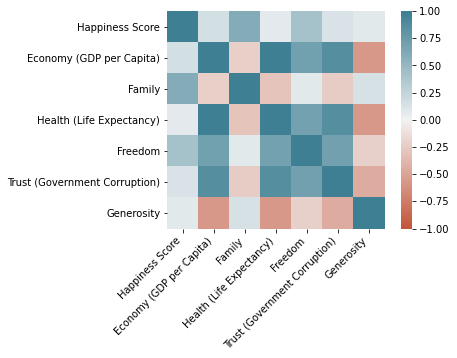

In [16]:
heatmap = sns.heatmap(
    combined_data.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);